# Prophet 라이브러리

메타(페이스북)에서 발표한 시계역 분석 머신러닝 라이브러리

`pip install prophet` 설치

## #01. 패키지

In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from pandas import read_excel, DataFrame, concat, Series, date_range
from pandas import to_datetime
from matplotlib import pyplot as plt

## #02. 데이터

In [2]:
# origin = read_excel("https://data.hossam.kr/G02/daily_mini_temp.xlsx")
origin = read_excel("data/daily_mini_temp.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3650 non-null   object 
 1   최저기온    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


,날짜,최저기온
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


> 문자열로 인식

## #03. 데이터 전처리

### 날짜 컬럼의 데이터 타입 수정

In [3]:
origin.columns

Index(['날짜', '최저기온'], dtype='object')

In [4]:
df = origin.copy()
df['날짜'] = to_datetime(df['날짜'], format='%m/%d/%Y')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3650 non-null   datetime64[ns]
 1   최저기온    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB
None


,날짜,최저기온
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### 데이터 프레임의 필드 이름 변경

prophet 라이브러리의 요구 사항에 따라 날짜 필드의 이름을 `ds`로, 데이터의 필드 이름을 `y`로 변경.

In [5]:
df.rename(columns={"날짜":"ds", "최저기온":"y"}, inplace=True)
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## #04. 시계열 분석 모델 구현

### 모델 정의 및 학습

In [6]:
m = Prophet()
m.fit(df)   #학습

20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing


### 학습 결과를 활용해 예측 수행

`periods`는 예측할 기간(일(`D`), 주(`W`), 월(`M`) 단위 설정 가능. 기본은 일 단위)

In [7]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.858854,11.930763,18.803392,11.858854,11.858854,3.328315,3.328315,3.328315,0.010955,0.010955,0.010955,3.317361,3.317361,3.317361,0.0,0.0,0.0,15.187170
1,1981-01-02,11.857015,11.817827,18.792957,11.857015,11.857015,3.375099,3.375099,3.375099,-0.019840,-0.019840,-0.019840,3.394939,3.394939,3.394939,0.0,0.0,0.0,15.232114
2,1981-01-03,11.855177,11.861228,18.744900,11.855177,11.855177,3.411920,3.411920,3.411920,-0.060119,-0.060119,-0.060119,3.472039,3.472039,3.472039,0.0,0.0,0.0,15.267097
3,1981-01-04,11.853338,11.787473,18.352914,11.853338,11.853338,3.394334,3.394334,3.394334,-0.153082,-0.153082,-0.153082,3.547416,3.547416,3.547416,0.0,0.0,0.0,15.247671
4,1981-01-05,11.851499,11.954577,18.756661,11.851499,11.851499,3.600142,3.600142,3.600142,-0.019706,-0.019706,-0.019706,3.619848,3.619848,3.619848,0.0,0.0,0.0,15.451641


### 예측 결과에 대한 시각화

- 검은색 점 : 실 데이터
- 파란색 선 : 모델이 예측한 데이터

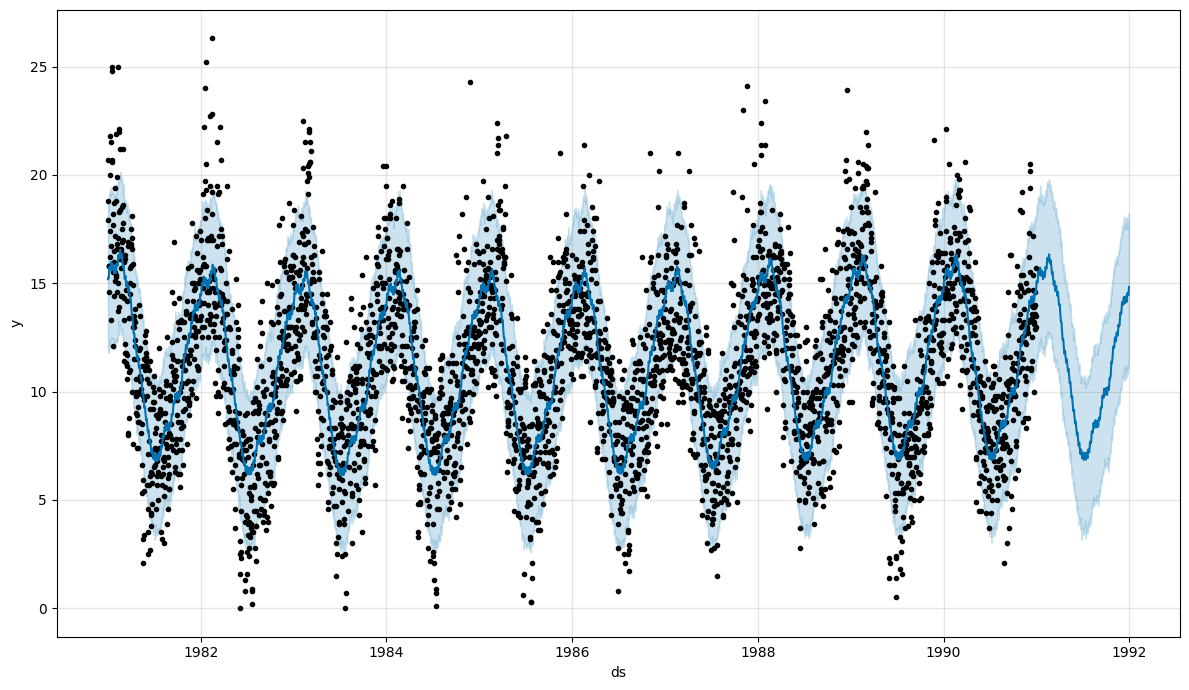

In [8]:
fig = m.plot(forecast, figsize=(12,7))

> 데이터가 급격히 변화하는 시점(changepoint)을 확인할 수 있음

### 모델이 갖는 컴포넌트 확인

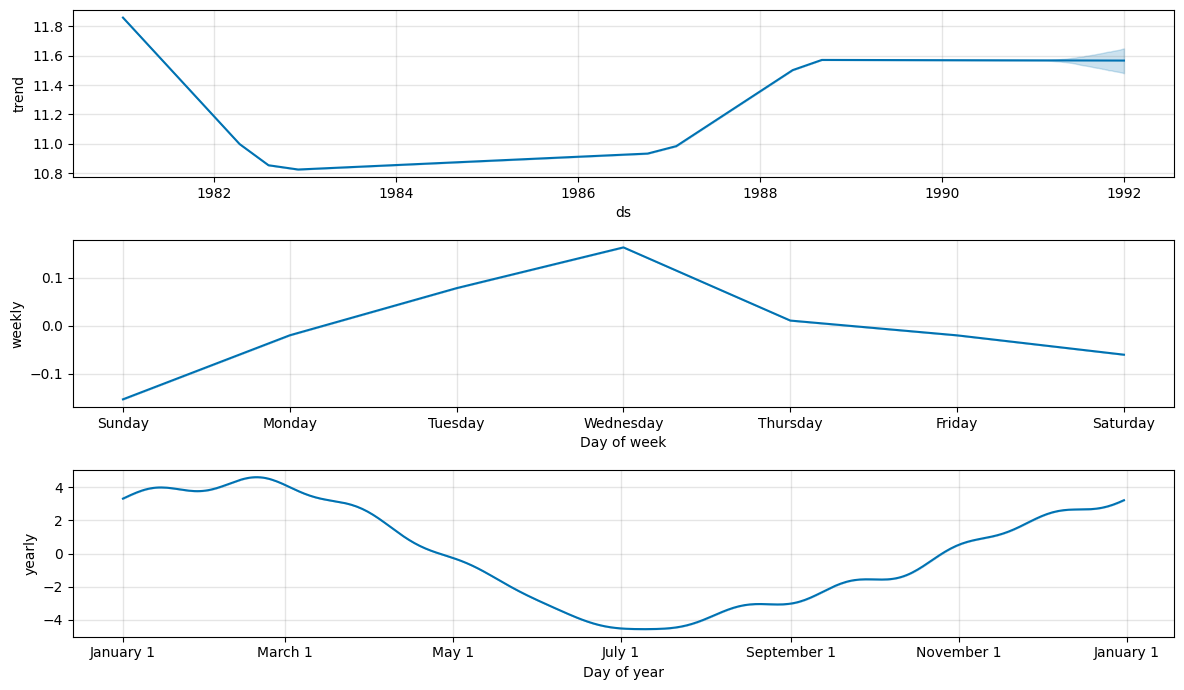

In [9]:
fig = m.plot_components(forecast, figsize=(12,7))

### changepoint를 추가한 시각과

changepoint : Trend가 변화하는 지점

- fig.gca()는 시계열 그래프
- m : 이전에 생성한 Prophet 모델 객체
- forecast : predict로 예측한 결과

[[<matplotlib.lines.Line2D at 0x1764b1c1fa0>],

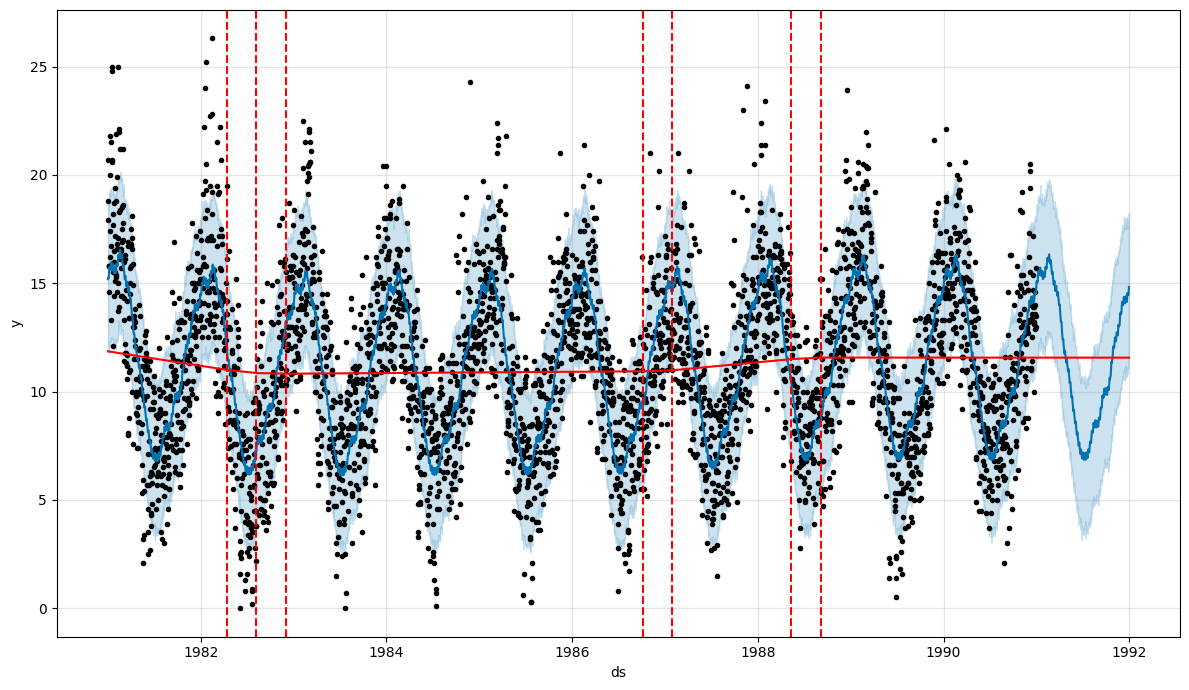

In [10]:
fig = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

> 붉은색 실선 : 트랜드, 붉은색 점선 : 트랜드가 변화하는 changepoint

## #05. 모델의 Trend 조절

| 파라미터 | 설명 |
| --- | --- |
| `changepoints` | 트랜드 변화 시점을 명시한 리스트 |
| `changepoint_prior_scale` | Trend의 유연성 조절(기본값=0.05) |
| `n_changepoints` | changepoint의 개수 |
| `changepoint_range` | changepoint의 설정 가능 범위 (기본적으로 데이터 중 `80%` 범위 내에서 changepoint를 설정) |

20:05:17 - cmdstanpy - INFO - Chain [1] start processing
20:05:20 - cmdstanpy - INFO - Chain [1] done processing


[[<matplotlib.lines.Line2D at 0x1764eaf16a0>],

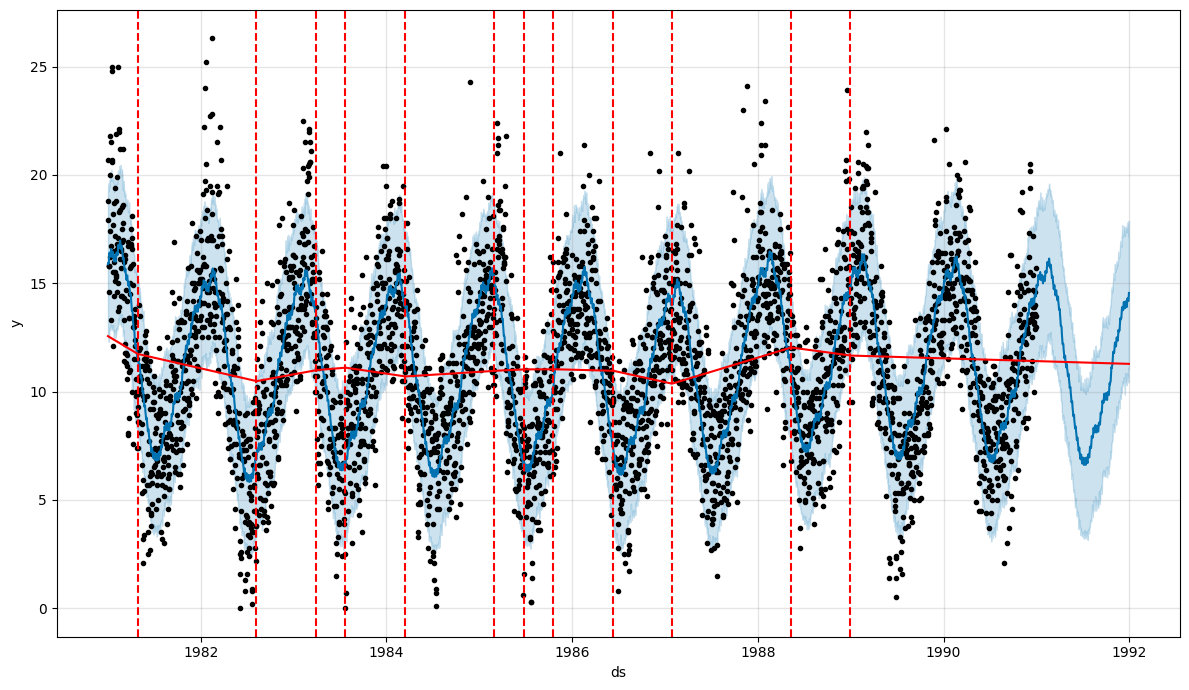

In [11]:
# 모델 구성
m = Prophet(changepoint_prior_scale=0.3)
m.fit(df)

# 예측
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

# 시각화
fig = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

## #06. 모델의 계절성(Seasonality) 조절

| 파라미터 | 설명 |
| --- | --- |
| `yearly_seasonality` | 연 계절성(기본값=auto) |
| `weekly_seasonality` | 주 계절성(기본값=auto) |
| `daily_seasonality` | 일 계절성(기본값=auto) |
| `seasonality_prior_scale` | 계절성 반영 강도 |
| `seasonality_mode` | `additive`(기본값) or `multiplicative` |

> 푸리에 급수를 사용해 계절성 패턴을 추정.

20:05:24 - cmdstanpy - INFO - Chain [1] start processing
20:05:26 - cmdstanpy - INFO - Chain [1] done processing


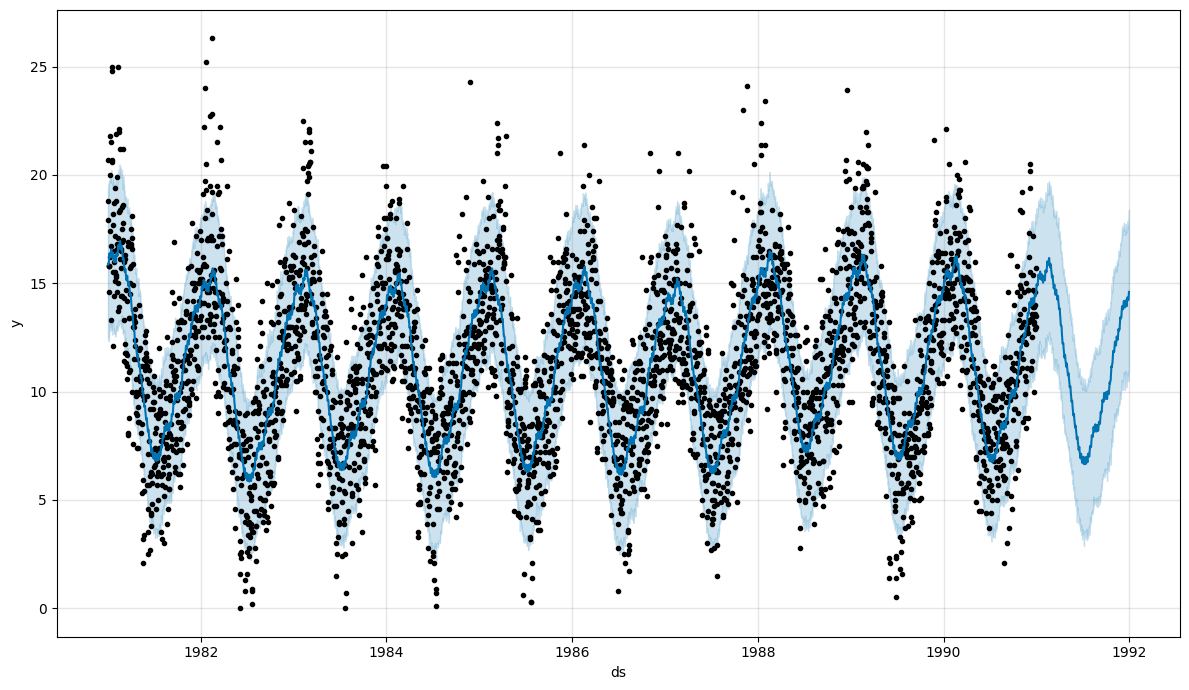

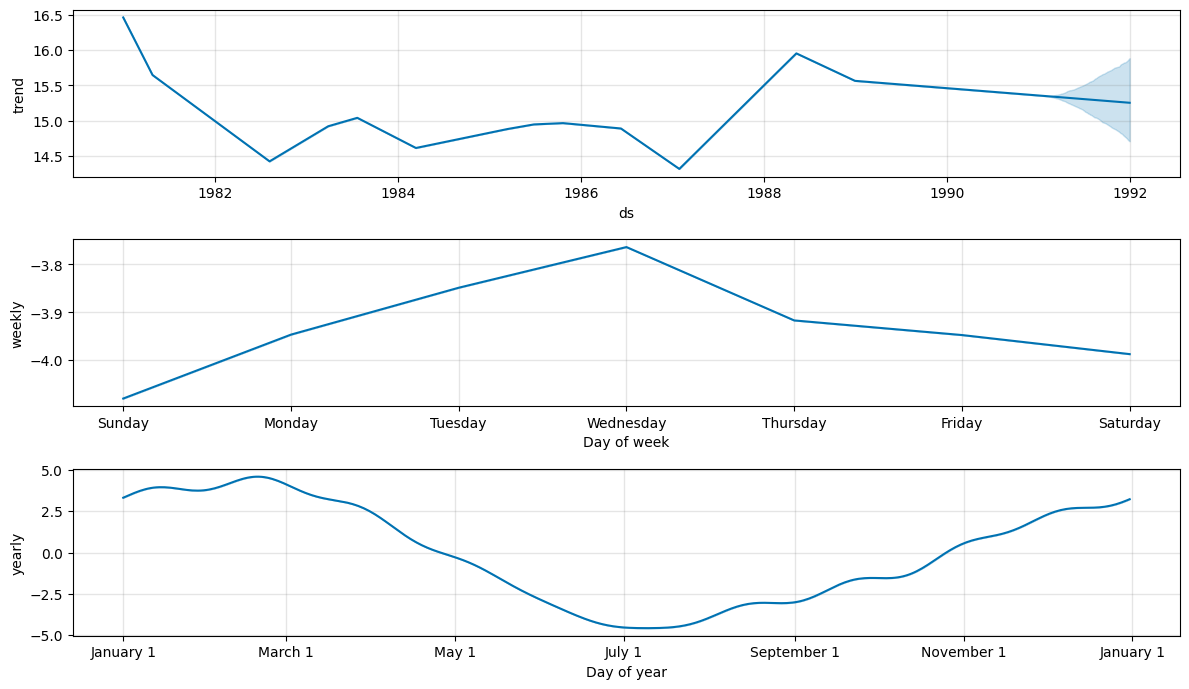

In [12]:
# 모델 구성
m = Prophet(
   # Trend
   changepoint_prior_scale=0.3,
   # Seasonality
   weekly_seasonality=10,
   yearly_seasonality=10,
   daily_seasonality=False
   )
m.fit(df)

# 예측
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

# 시각화
fig1 = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast, figsize=(12,7))

## #07. 계절성 주기 직접 생성

20:05:32 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1] done processing


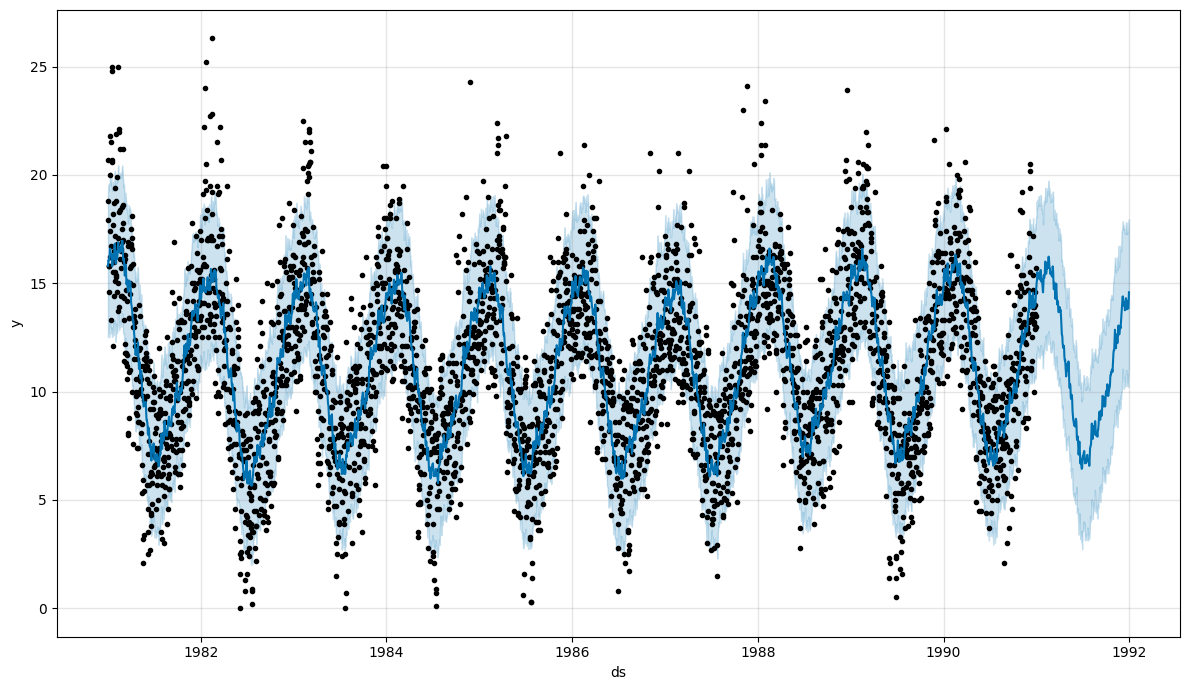

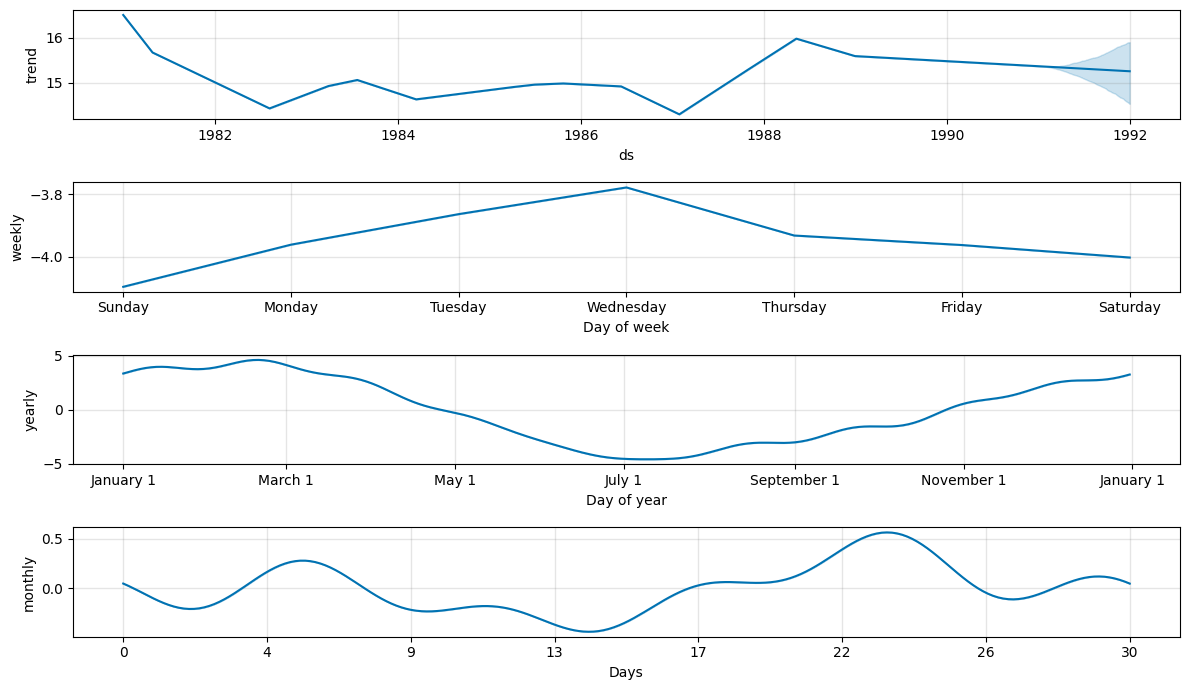

In [13]:
# 모델 구성
m = Prophet(
   # Trend
   changepoint_prior_scale=0.3,
   # Seasonality
   weekly_seasonality=10,
   yearly_seasonality=10,
   daily_seasonality=False
   )
# period : 한달은 판단하기 위한 주기
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

# 예측
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

# 시각화
fig1 = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast, figsize=(12,7))

## #08. 공휴일 지정

### 직접 공휴일 DF 생성

`holiday`, `ds` 두 개의 필드를 갖는 데이터 프레임을 생성해야 한다.

`holiday` 필드에는 모두 `holiday`라는 문자열 값을 설정

In [14]:
holidays = DataFrame({
   "holiday":"holiday",
   'ds':concat([
      Series(date_range('2017-05-05', '2017-06-03', freq='D')), 
      Series(date_range('2018-05-05', '2018-06-03', freq='D')), 
      Series(date_range('2019-05-05', '2019-06-03', freq='D')), 
      Series(date_range('2020-05-05', '2020-06-03', freq='D')), 
   ])
})

holidays.head()

,holiday,ds
0,holiday,2017-05-05
1,holiday,2017-05-06
2,holiday,2017-05-07
3,holiday,2017-05-08
4,holiday,2017-05-09


20:05:45 - cmdstanpy - INFO - Chain [1] start processing
20:05:49 - cmdstanpy - INFO - Chain [1] done processing


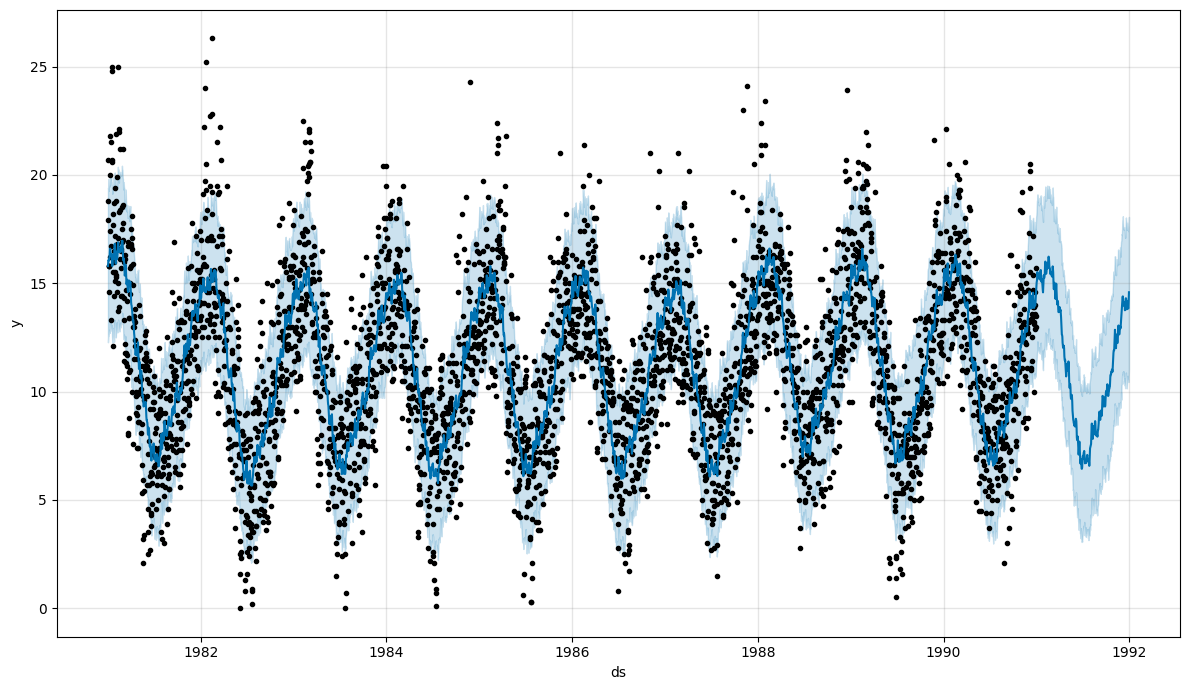

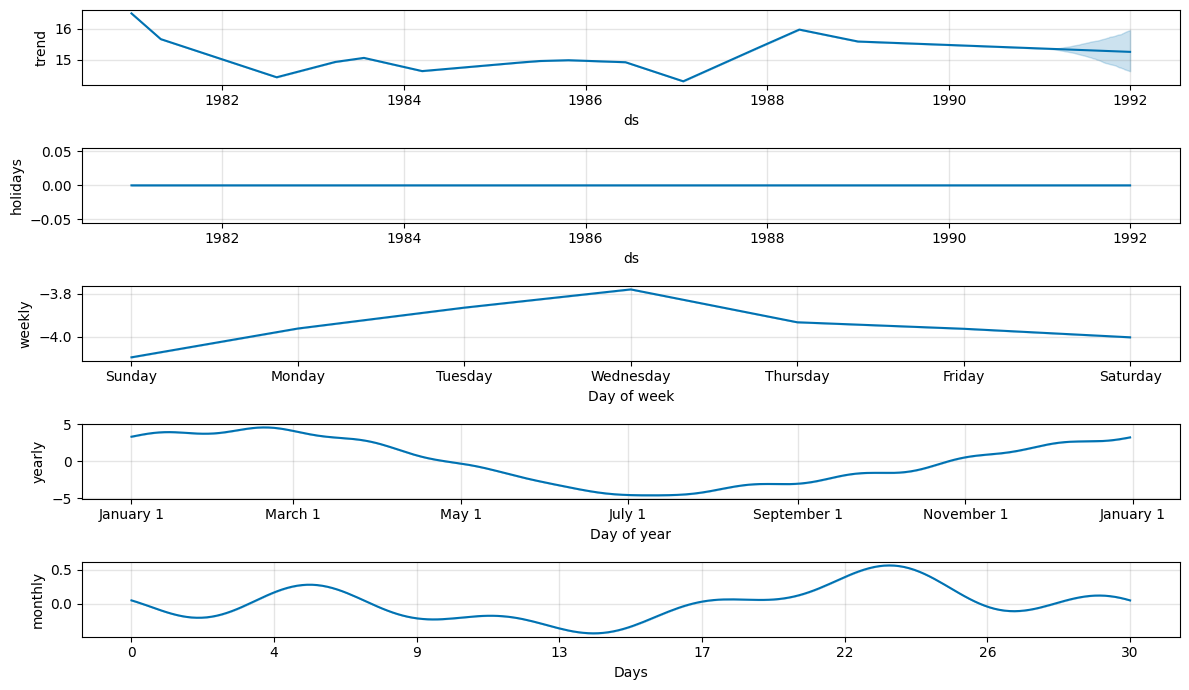

In [15]:
# 모델 구성
m = Prophet(
   # Trend
   changepoint_prior_scale=0.3,
   # Seasonality
   weekly_seasonality=10,
   yearly_seasonality=10,
   daily_seasonality=False,
   # Holidays
   holidays=holidays,
   # 공휴일 반영 강도
   holidays_prior_scale=15
   )
# period : 한달은 판단하기 위한 주기
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

# 예측
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

# 시각화
fig1 = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast, figsize=(12,7))

### API 기능을 활용한 공휴일 지정

facebook API 활용

#### 사용가능 국가 목록

Korea (KR), Brazil (BR), Indonesia (ID), India (IN), Malaysia (MY), Vietnam (VN), Thailand (TH), Philippines (PH), Pakistan (PK), Bangladesh (BD), Egypt (EG), China (CN), and Russian (RU), Belarus (BY), and United Arab Emirates (AE)

20:05:57 - cmdstanpy - INFO - Chain [1] start processing
20:06:02 - cmdstanpy - INFO - Chain [1] done processing


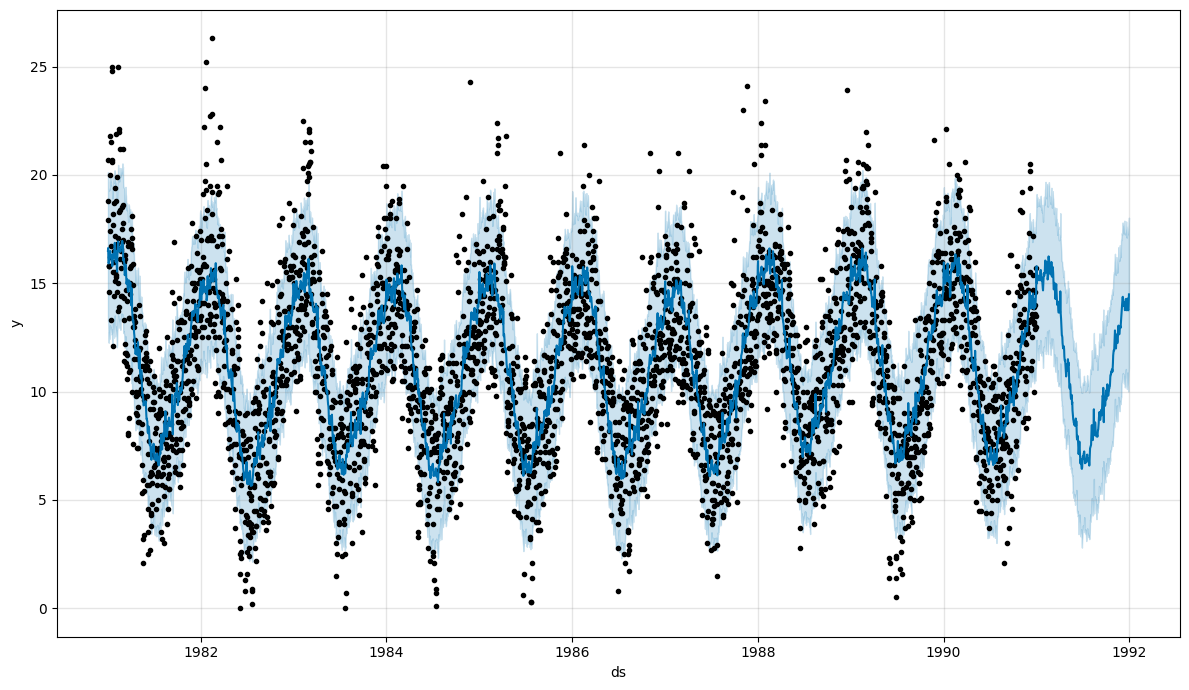

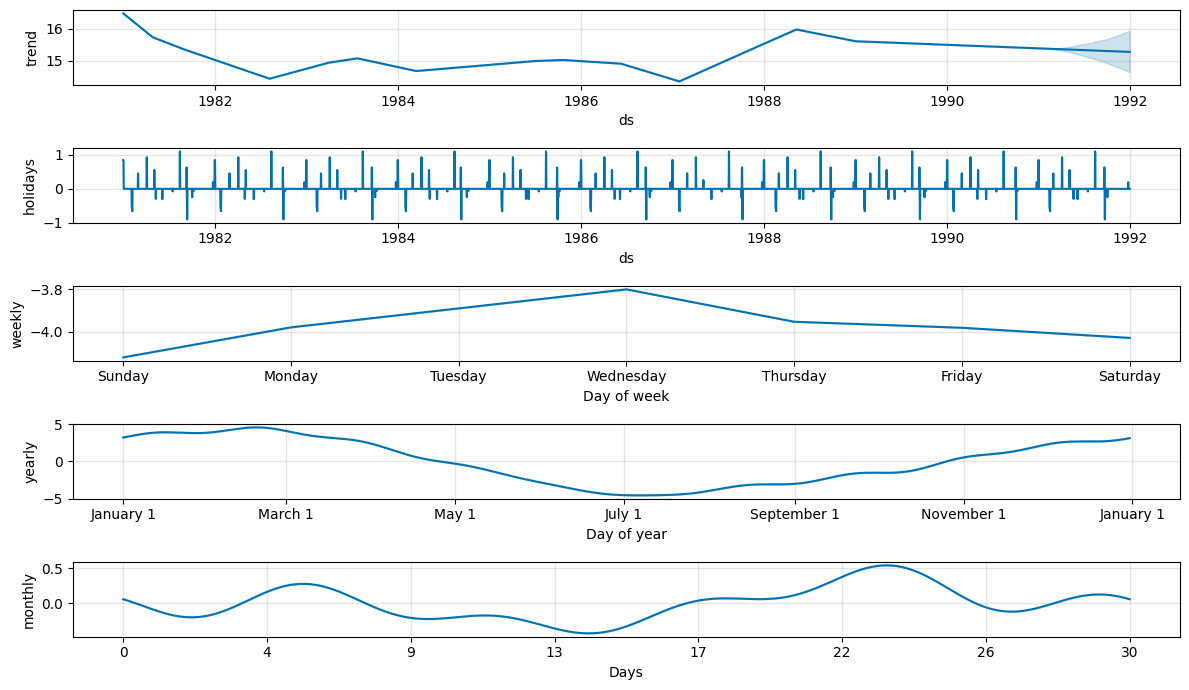

In [16]:
# 모델 구성
m = Prophet(
   # Trend
   changepoint_prior_scale=0.3,
   # Seasonality
   weekly_seasonality=10,
   yearly_seasonality=10,
   daily_seasonality=False
   )

# 공휴일 데이터 추가
m.add_country_holidays(country_name='KR')


# period : 한달은 판단하기 위한 주기
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

# 예측
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

# 시각화
fig1 = m.plot(forecast, figsize=(12,7))
add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast, figsize=(12,7))

### 학습에 사용된 공휴일 확인

In [17]:
m.train_holiday_names

0                       New Year's Day
1                       Lunar New Year
2     The day preceding Lunar New Year
3     The second day of Lunar New Year
4            Independence Movement Day
5                    Tree Planting Day
6                    Buddha's Birthday
7                       Children's Day
8                         Memorial Day
9                     Constitution Day
10                      Liberation Day
11             National Foundation Day
12                          Hangul Day
13                             Chuseok
14           The day preceding Chuseok
15           The second day of Chuseok
16                       Christmas Day
dtype: object